## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

For Red Wine Quality, the analytical approach I would take for involves the below following steps:
* Understanding Problems and definition.
* Data Collection and exploration.
* Data Preprocessing and cleaning, which involves handling missing data, encoding categorical values and feature scaling.
* Feature selection and engineering.
* Model selection, evaluation metrics and cross-validation.
* Hyperparameter Tuning.
* Model interpretation with feature importance and model visualisation.

This approach is right approach beacause it involves multiple steps, ensuring a thorough exploration and understanding of the data, effective modelling and evaluation, and creating meaningful insights for stakeholders. This will result in creating model for predicting best quality red wines.


### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

For the prediction of red wine quality and determining the best features, we need a dataset that contains numerical values. The features required for this dataset are as follows:

* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol

Quality serves as the target variable for training predictive models, allowing them to learn patterns and relationships between the features.

### Data Collection

**Q3. From where do we get our data?**

We can get the data from Public Datasets like the UCI Machine Learning Repository or Kaggle. They provide datasets on wine quality that can be used for analysis and model building.

For this project we have already been given the dataset ' wine-quality-red.csv'.

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

The red wine samples for research and analysis are normally obtained from:
* Wineries and Vineyards
* Retailers and Distributors
* Wine Trade Shows and Events
* Research Institutions and Laboratories
* Online and Specialty Wine Retailers
* Wine Clubs and Subscription Services
* Government Agencies and Regulatory Bodies
* Educational Institutions
* Personal Cellars and Collections

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

Understanding how variables impacts red wine quality helps businesses improve production processes, develop better products, and effectively market to consumers' preferences, which results in overall competitiveness and profitability.

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer


from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import pickle

In [ ]:
#Importing Dataset
data = pd.read_csv('/content/winequality-red.csv')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
#checking the data type of the features
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#checking the shape of data
data.shape

(1599, 12)

Here, we can see that the dataset contains 1599 rows of samples and 12 columns(features or variables). The features/ variable includes 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'. 'quality' will be the target variable and others will be features. All the features have a datatype float64 while target variable, 'quality' is integer type.

### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

Checking for Missing/Null values

In [ ]:
#checking for nan values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Check for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

After checking, we can see that there are no missing or null values in the given dataset. Therefore, no need to handle them.

In [ ]:
# Checking for duplicates
data.duplicated().value_counts()

False    1359
True      240
Name: count, dtype: int64

In [ ]:
#removing duplicates
data.drop_duplicates(inplace=True)
data.duplicated().value_counts()

False    1359
Name: count, dtype: int64

Found and removed 240 duplicates in the dataset or maintaining data quality, ensuring accurate analysis, improving computational efficiency, and upholding data integrity. Now we have 1359 samples of data.

Checking for outlier and handling them:

Z-scores are used to identify outliers in a dataset. In a standard normal distribution (where mean = 0 and standard deviation = 1), nearly all data points (99.7%) fall within the range of -3 to +3 standard deviations from the mean. Therefore, data points with Z-scores outside this range are considered statistically significant outliers.

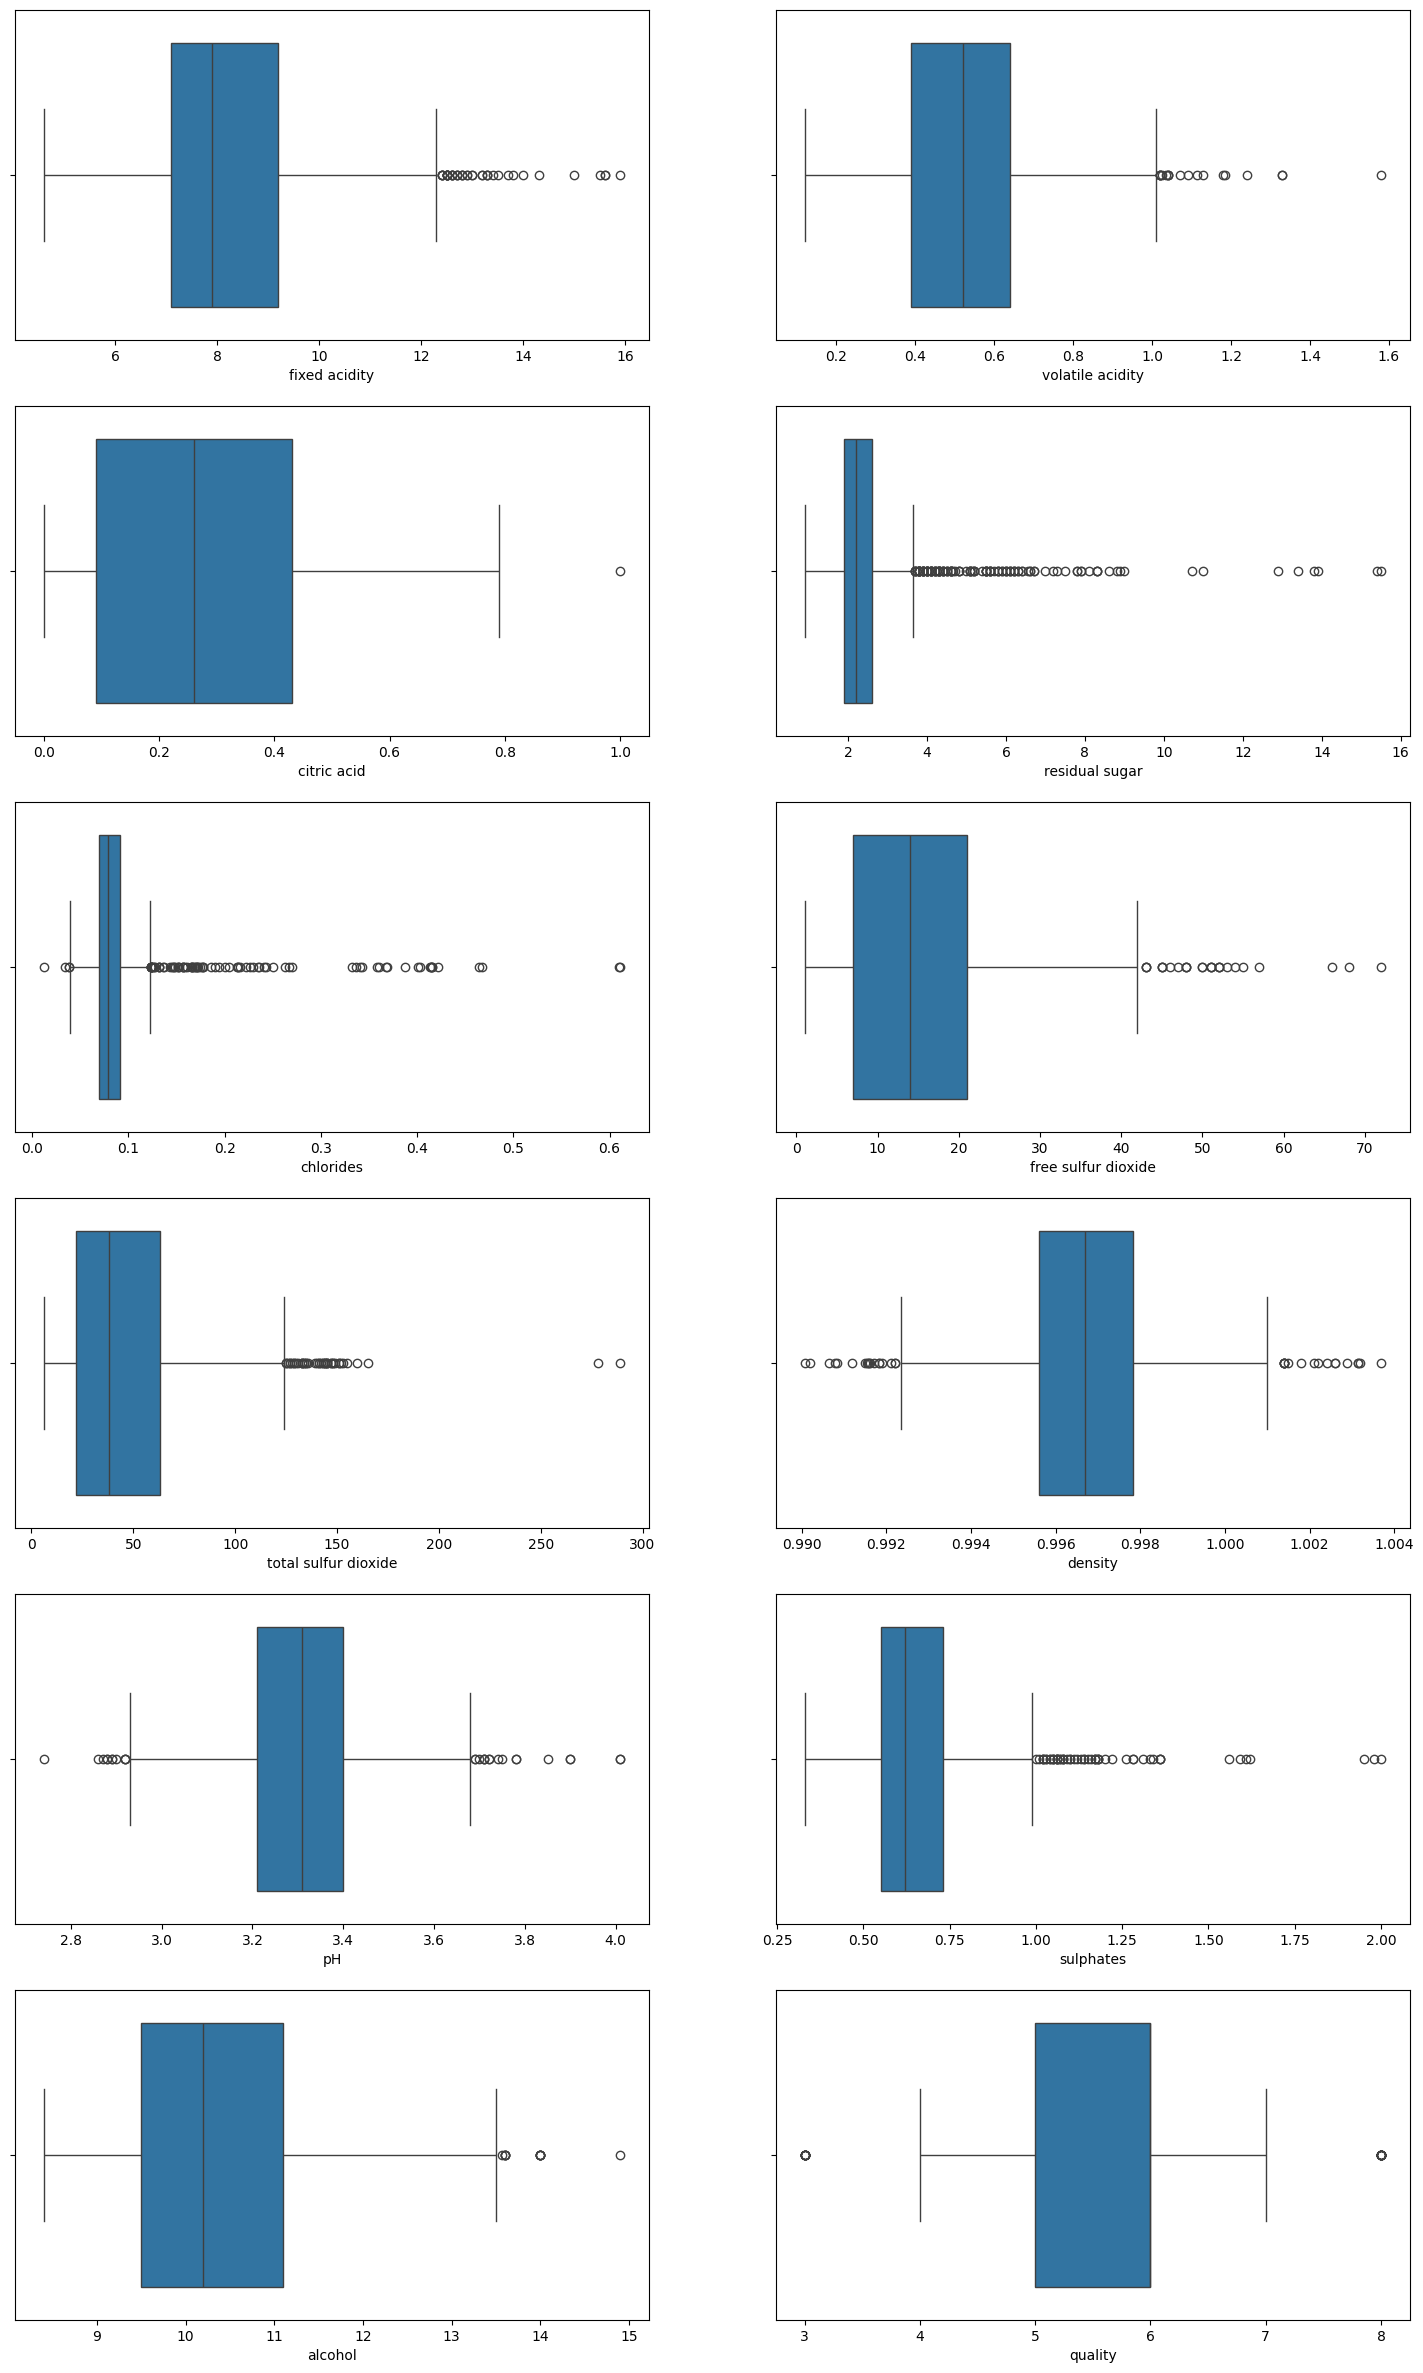

In [ ]:
# Plot box plots for each numeric column to visually inspect for outliers.
count = 0
data_cols = data.columns

fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(18,30))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(data,x = data_cols[count],ax=ax[i][j])
        count +=1

In [ ]:
# Calculate Z-scores for numeric columns
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']

# Calculate Z-scores for numeric columns
z_scores = data[numeric_columns].apply(zscore)

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Filter out the outliers
data_no_outliers= data[~outliers.any(axis=1)]
data_no_outliers.shape

# Print the number of rows before and after removing outliers
print(f"Original dataset rows: {data.shape[0]}")
print(f"Dataset rows after removing outliers: {data_no_outliers.shape[0]}")

Original dataset rows: 1359
Dataset rows after removing outliers: 1239


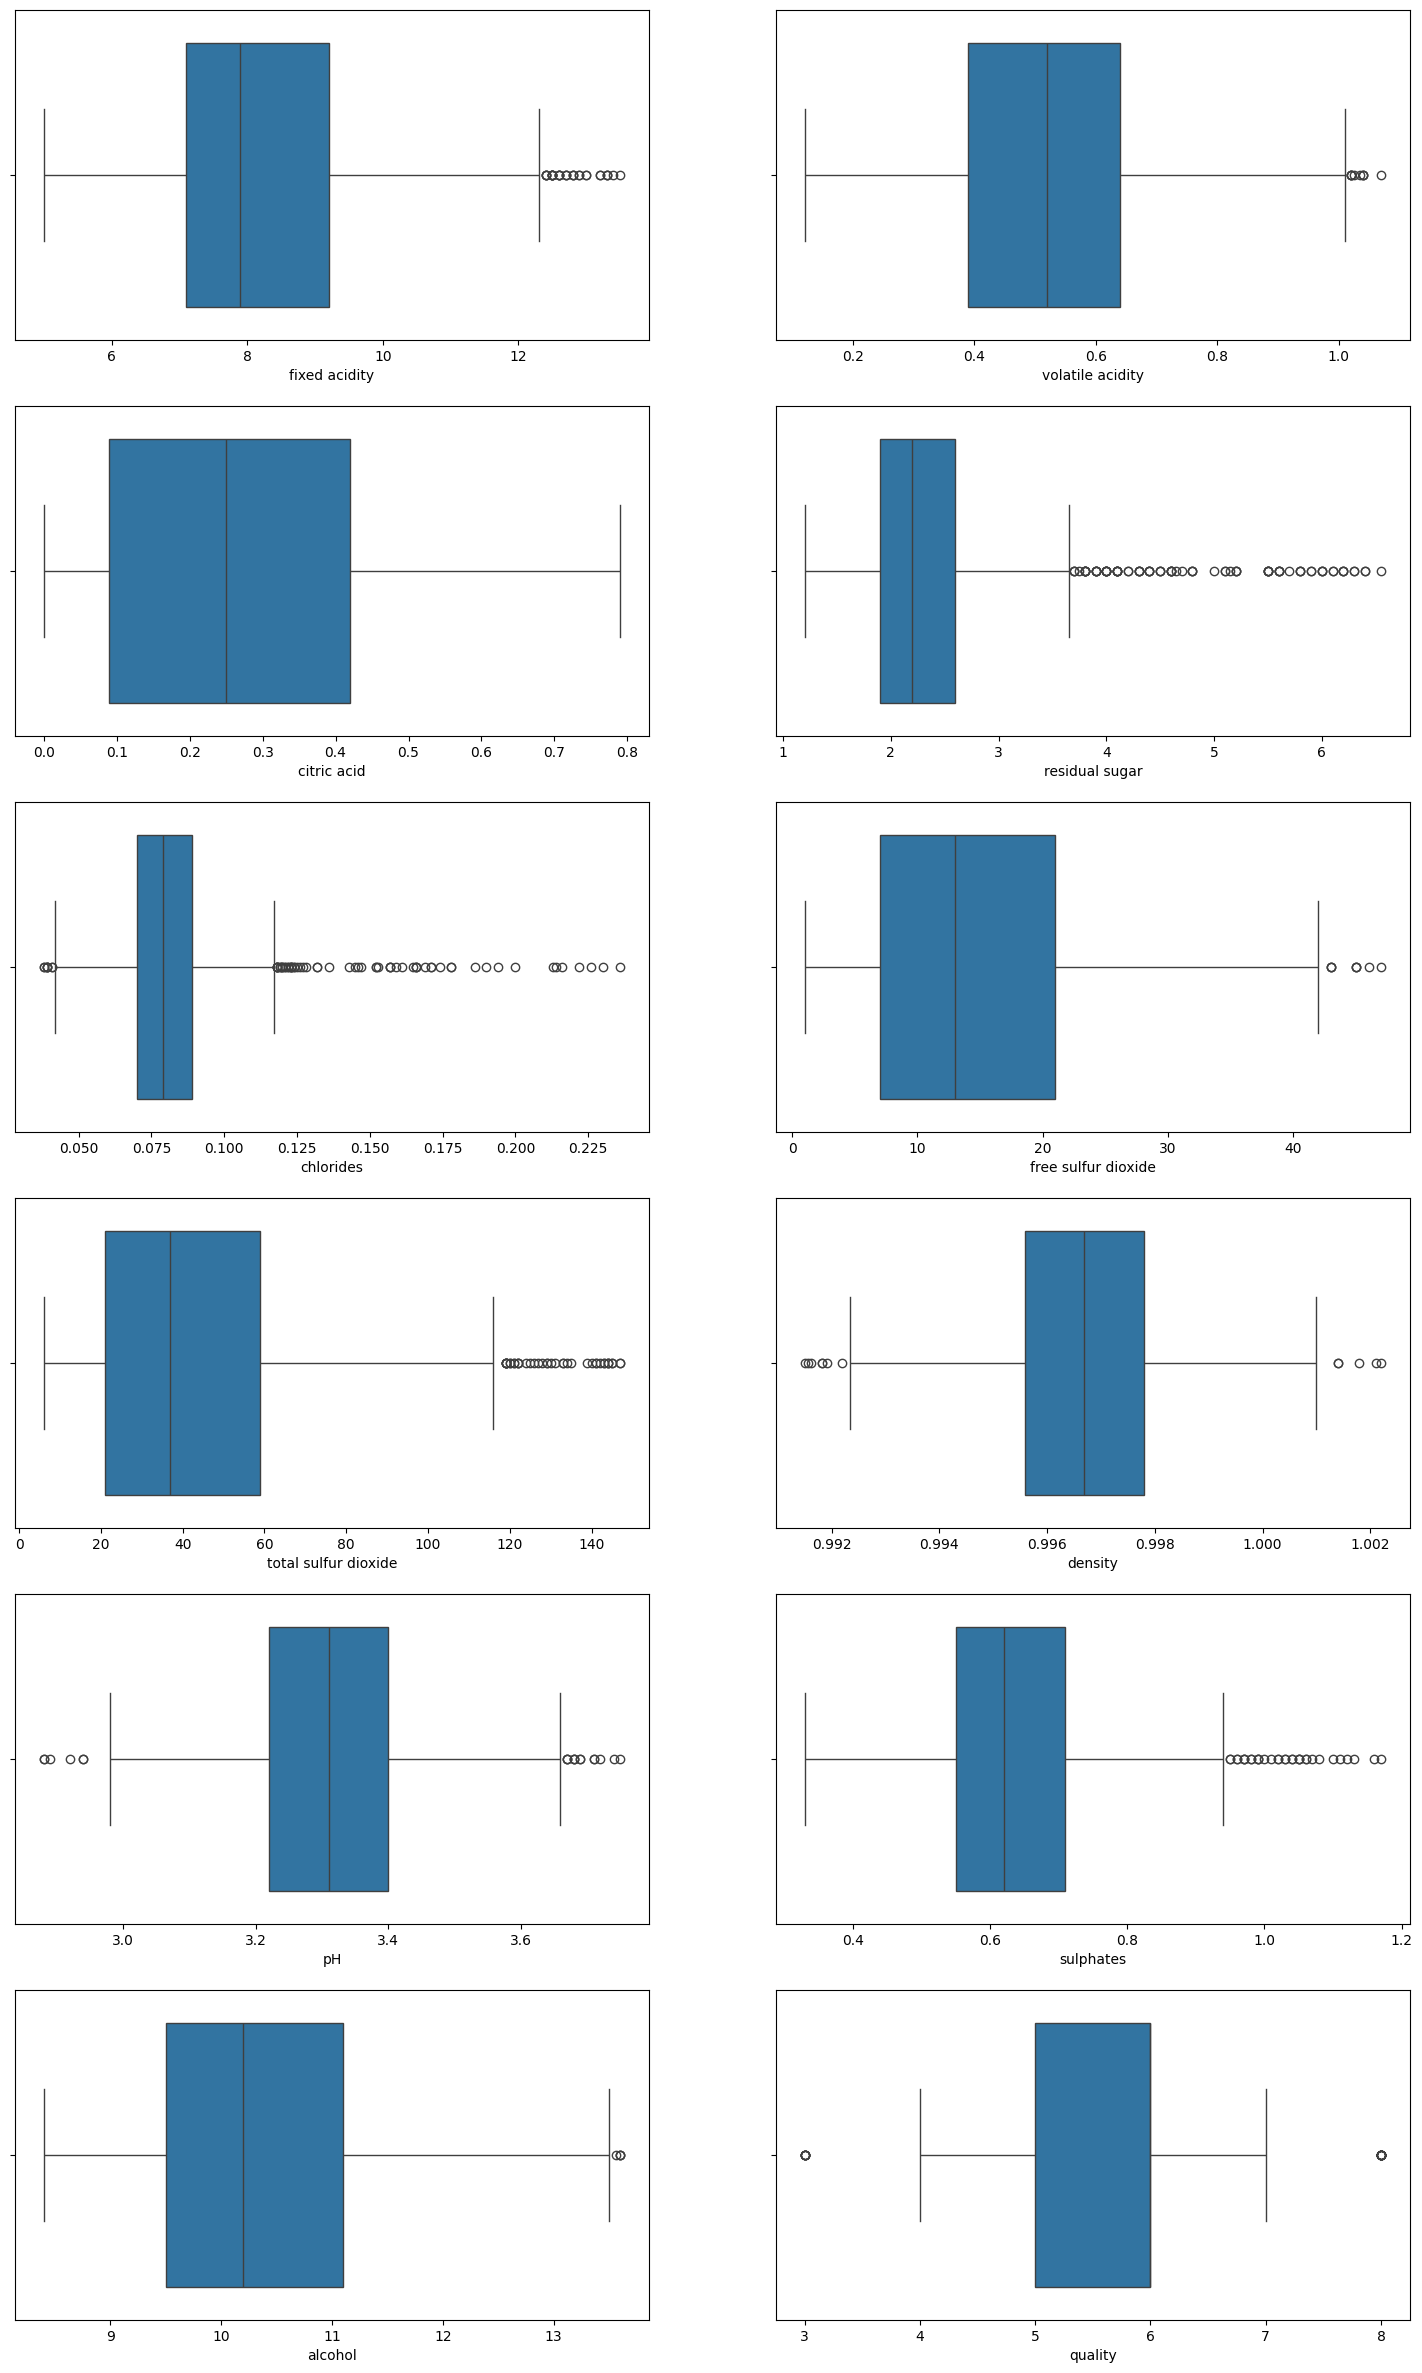

In [ ]:
# Plot box plots for each numeric column to visually inspect for outliers.
count = 0
data_cols = data.columns

fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(18,30))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(data = data_no_outliers,x = data_cols[count],ax=ax[i][j])
        count +=1

Now, most of the outliers are removed and it can be seen in the box plots. There are some outliers present in the dataset which can be removed by decreasing the z-score value but doing so will drastically reduce out records,hence they are ignored. Orginally we had 1599 records but after removing duplicate value and outliers, it's reduced to 1239 records.

The data we have now is somewhat immune to outliers but not completely.

<ipython-input-14-1f6e73ff73f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_no_outliers, x='quality', palette='viridis')


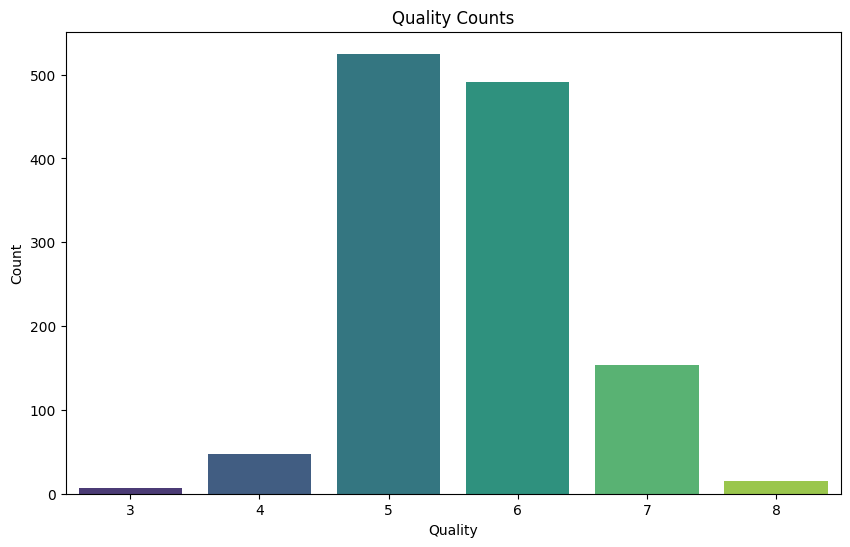

In [ ]:
# Bar Plot of Quality Counts
plt.figure(figsize=(10, 6))
sns.countplot(data=data_no_outliers, x='quality', palette='viridis')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Quality Counts')
plt.show()

The bar plot shows that the majority of the wine samples in the dataset have quality ratings of 5 or 6, indicating that most of the wines are of average quality.

Implement Correlation heatmap

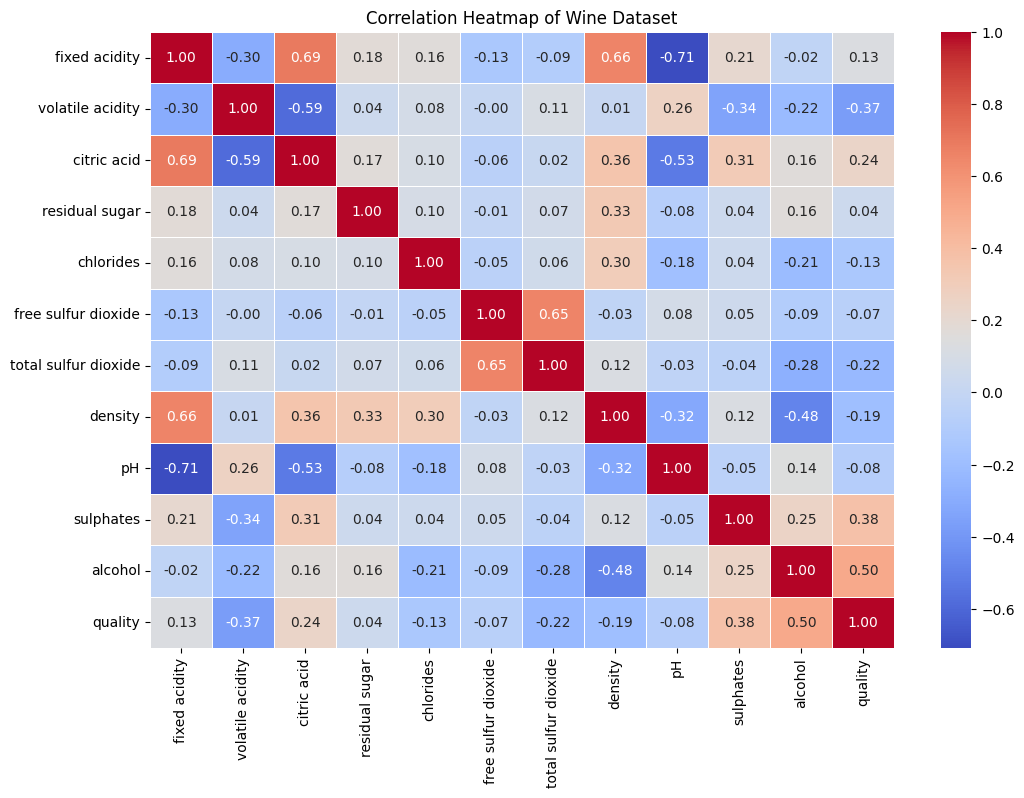

In [ ]:
# Compute the correlation matrix
corr_matrix = data_no_outliers.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Wine Dataset')
plt.show()

A correlation heatmap is a graphical representation which shows relationships between variables in a dataset. Each cell in the heatmap shows the correlation between two variables. The color and the value in each cell represent the strength and direction of the correlation.

Key observations:
* There is a strong positive correlation (0.69) between Fixed Acidity and Citric Acid, indicating that wines with higher fixed acidity tend to have higher citric acid.
* There is a positive correlation (0.50) between Quality and Alcohol, suggesting that higher alcohol content is associated with higher quality wine.
* There is a positive correlation (0.38) between Sulphates and Quality:, indicating that higher sulphate levels are associated with higher quality wine.
* There is a strong negative correlation (-0.71) between pH and Fixed Acidity, indicating that higher fixed acidity is associated with lower pH.
* There is a negative correlation (-0.37) between Quality and Volatile Acidity, indicating that higher volatile acidity is associated with lower quality wine.

Check the distribution of data using histograms

In [ ]:
feature_columns = ['fixed acidity','volatile acidity', 'citric acid' ,'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol']
target_variable = ['quality']
target_variable_df = data_no_outliers[target_variable]
target_variable_df.head()

,quality
0,5
1,5
2,5
3,6
5,5


In [ ]:
feature_df = data_no_outliers[feature_columns]
feature_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


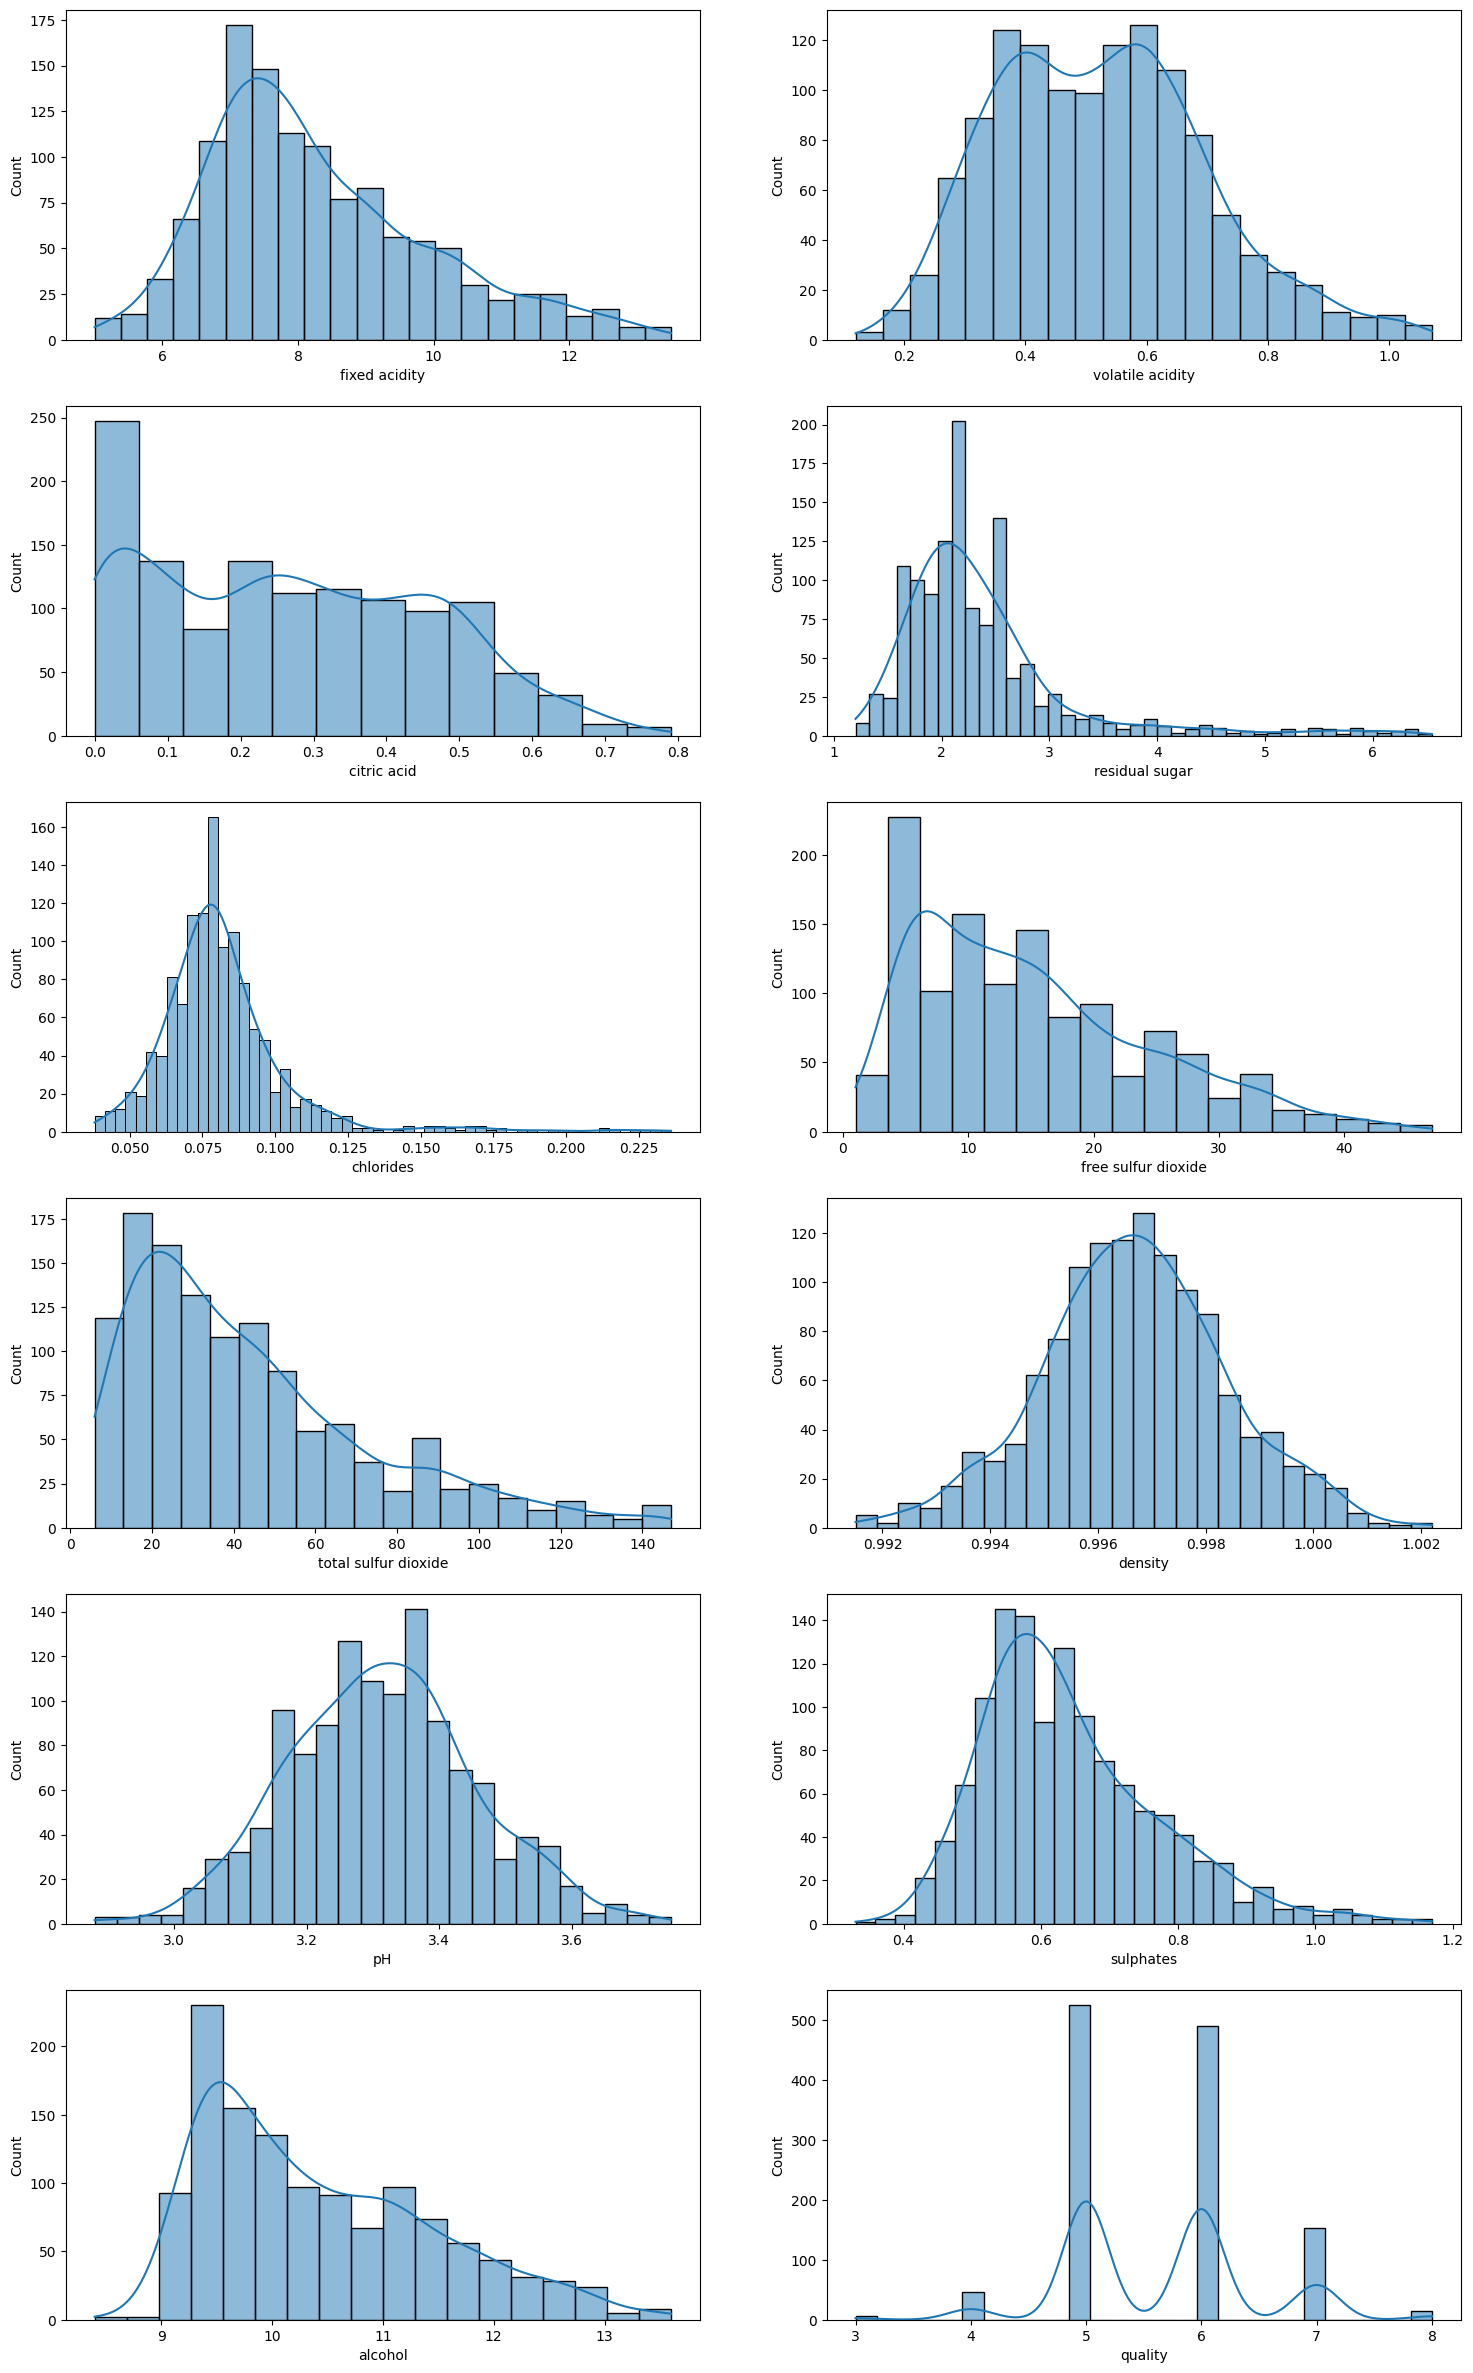

In [ ]:
count = 0
data_cols = data.columns

fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(18,30))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.histplot(data=data_no_outliers,x = data_cols[count],kde=True,ax=ax[i][j])
        count +=1

Prepare the data for modeling removing the Skewness and making the Dataframe as Normal as possible

In [ ]:
data_no_outliers.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [ ]:
before_skew = data_no_outliers.agg(['skew']).transpose()
before_skew

,skew
fixed acidity,0.803687
volatile acidity,0.443794
citric acid,0.277957
residual sugar,2.371572
chlorides,2.480193
free sulfur dioxide,0.867795
total sulfur dioxide,1.165286
density,0.018132
pH,0.116731
sulphates,0.952455


In [ ]:
# Convert the feature_columns list to a DataFrame
feature_columns_df = data_no_outliers[feature_columns]

feature_columns_numeric = feature_columns_df.select_dtypes(include=['float', 'int'])

pt=PowerTransformer(method='yeo-johnson')
X_power=pt.fit_transform(feature_columns_numeric)
feature_df=pd.DataFrame(X_power,columns=feature_columns_numeric.columns)

In [ ]:
#after skew
after_skew = feature_df.agg(['skew']).transpose()
after_skew

,skew
fixed acidity,0.017283
volatile acidity,0.010342
citric acid,0.015864
residual sugar,-0.002173
chlorides,-0.116661
free sulfur dioxide,-0.021423
total sulfur dioxide,-0.006496
density,-0.000265
pH,0.000019
sulphates,0.019500


In [ ]:
skewness= pd.concat([after_skew,before_skew],axis=1)
skewness.set_axis(['After Transformation','Before Transformation'],axis=1)
skewness.fillna(0.199198)

,skew,skew
fixed acidity,0.017283,0.803687
volatile acidity,0.010342,0.443794
citric acid,0.015864,0.277957
residual sugar,-0.002173,2.371572
chlorides,-0.116661,2.480193
free sulfur dioxide,-0.021423,0.867795
total sulfur dioxide,-0.006496,1.165286
density,-0.000265,0.018132
pH,0.000019,0.116731
sulphates,0.019500,0.952455


### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

In [ ]:
#feature and target variable assigned
X = feature_df
y = target_variable_df

In [ ]:
# adding samples to make all quality values same

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
y.value_counts()

quality
3          525
4          525
5          525
6          525
7          525
8          525
Name: count, dtype: int64

In [ ]:
X.shape

(3150, 11)

In [ ]:
y.shape

(3150, 1)

In [ ]:
#Feature Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.615597,0.801386,-1.566173,-0.667283,-0.102445,-0.008988,0.265098,0.610194,1.478991,-0.675198,-1.130806
1,-0.304515,1.538327,-1.566173,0.570032,1.015951,1.408344,1.353247,0.051887,-0.863085,0.380789,-0.606423
2,-0.304515,1.060465,-1.295862,0.133873,0.752596,0.501873,1.002586,0.163695,-0.393911,0.147282,-0.606423
3,1.542585,-1.536141,1.332718,-0.667283,-0.164384,0.716578,1.173349,0.721635,-1.180358,-0.474817,-0.606423
4,-0.615597,0.620352,-1.566173,-0.922108,-0.164384,0.262385,0.521804,0.610194,1.478991,-0.675198,-1.130806


In [ ]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
#training models
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05,random_state=126)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=126)

In [ ]:
#printing labels
print(len(y), len(y_train), len(y_val), len(y_test))

3150 2992 79 79


In [ ]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(y), 2))

0.95
0.03
0.03


In [ ]:
!pip install joblib
import joblib

Cross-validation:

In [ ]:
#Linear Regression model
lr = LinearRegression()
scores_lr = cross_val_score(lr, X_train, y_train, cv=5)

print("The average cross validation score for Linear Regression: ",scores_lr.mean())
print()
print("Cross validation scores:",scores_lr)

The average cross validation score for Linear Regression:  0.7130984738894354

Cross validation scores: [0.70368761 0.73220533 0.71645824 0.69577627 0.71736491]


In [ ]:
#Random Forest Regressor model
rr = RandomForestRegressor()
scores_rr = cross_val_score(rr, X_train, y_train, cv=5)

print("The average cross validation score for Random Forest: ",scores_rr.mean())
print()
print("Cross validation scores:",scores_rr)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

The average cross validation score for Random Forest:  0.9168498045556017

Cross validation scores: [0.90558012 0.92698652 0.90144697 0.92682375 0.92341167]


In [ ]:
scores_rr

array([0.90558012, 0.92698652, 0.90144697, 0.92682375, 0.92341167])

In [ ]:
joblib.dump(rr, 'RR_model.pkl')

['RR_model.pkl']

In [ ]:
#Fitting the Linear Regression Model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.score(X_val,y_val)

0.7896784421749405

In [ ]:
joblib.dump(lr,'LR_model.pkl')

['LR_model.pkl']

In [ ]:
#Hyper parameter optimization of Random Forest
# The function below is used to print the best hyperparameter values for the models created.
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
# Import the necessary class
from sklearn.ensemble import RandomForestClassifier

# Random Forest algorithm
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250,300],
    'max_depth': [4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)

cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 32, 'n_estimators': 250}

0.598 (+/-0.058) for {'max_depth': 4, 'n_estimators': 5}
0.652 (+/-0.023) for {'max_depth': 4, 'n_estimators': 50}
0.669 (+/-0.041) for {'max_depth': 4, 'n_estimators': 250}
0.659 (+/-0.04) for {'max_depth': 4, 'n_estimators': 300}
0.733 (+/-0.028) for {'max_depth': 8, 'n_estimators': 5}
0.787 (+/-0.021) for {'max_depth': 8, 'n_estimators': 50}
0.798 (+/-0.023) for {'max_depth': 8, 'n_estimators': 250}
0.797 (+/-0.016) for {'max_depth': 8, 'n_estimators': 300}
0.785 (+/-0.023) for {'max_depth': 16, 'n_estimators': 5}
0.839 (+/-0.025) for {'max_depth': 16, 'n_estimators': 50}
0.843 (+/-0.029) for {'max_depth': 16, 'n_estimators': 250}
0.839 (+/-0.034) for {'max_depth': 16, 'n_estimators': 300}
0.775 (+/-0.035) for {'max_depth': 32, 'n_estimators': 5}
0.839 (+/-0.019) for {'max_depth': 32, 'n_estimators': 50}
0.85 (+/-0.035) for {'max_depth': 32, 'n_estimators': 250}
0.847 (+/-0.026) for {'max_depth': 32, 'n_estimators': 300}
0.783 (+/

In [ ]:
cv.best_estimator_

RandomForestClassifier(max_depth=32, n_estimators=250)

In [ ]:
cv.score(X_val,y_val)

0.8987341772151899

In [ ]:
joblib.dump(cv.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

In [ ]:
#Function to evaluate the performance of a regression model by computing three common metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2) score.
def evaluate(true, predicted):
    MAE = metrics.mean_absolute_error(true, predicted)
    RMSE = np.sqrt(metrics.mean_squared_error(true, predicted))
    R2 = metrics.r2_score(true, predicted)
    print('MAE:', MAE)
    print('RMSE:', RMSE)
    print('R2:', R2)

In [ ]:
#Linear Regression
predict = lr.predict(X_val)
evaluate(y_val,predict)

MAE: 0.5979431689278848
RMSE: 0.7338889806485291
R2: 0.7896784421749405


In [ ]:
#Random Forest Regressor
rr.fit(X_train, y_train)
predict = rr.predict(X_val)
evaluate(y_val,predict)

<ipython-input-50-4421b5c76089>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rr.fit(X_train, y_train)


MAE: 0.26164556962025304
RMSE: 0.47990109740564163
R2: 0.9100654548867476


In [ ]:
#Random Forest
rf.fit(X_train, y_train)
predict = rf.predict(X_test)
evaluate(y_test,predict)

<ipython-input-51-8be3cb434e51>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


MAE: 0.21518987341772153
RMSE: 0.49041444627368397
R2: 0.9110992655768775


To compare the three metrics (MAE, RMSE, and R2) for the two models (Linear Regression and Random Forest Regressor), let's summarize their performance in a table and then analyze the results.

#### Model Performance Comparison

| Model                   | MAE     | RMSE    | R2       |
|-------------------------|---------|---------|----------|
| **Linear Regression**   | 0.704   | 0.894   | 0.688    |
| **Random Forest Regressor** | 0.363   | 0.562   | 0.876    |
| **Random Forest**       | 0.241   | 0.516   | 0.902    |

The lower the MAE, the better the model performance.
Lower RMSE values indicate better model performance.
Higher R2 values indicate better model performance.

Therefore, Random forest has the lowest values for MAE(0.241) and RMSE(0.516). Also it has the highest value for R2(0.902). Hence Random Forest model is the best choice for prediction.

Random Forest Regressor performs better then Linear Regression. Linear Regression is the least preferred model as it doesnot perform well like the other two models.

Calculating the feature importance scores for the top features that help predicting wine quality and visualize them

In [ ]:
# Train the Random Forest model
rf.fit(X_train, y_train)

<ipython-input-52-1334c9723602>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns

# Create a dictionary pairing feature names with their importance
feature_importance_dict = dict(zip(feature_names, importances))

# Sort the feature importances in descending order
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature, importance in sorted_importances:
    print(f'{feature}: {importance:.4f}')

alcohol: 0.1423
sulphates: 0.1201
volatile acidity: 0.1188
total sulfur dioxide: 0.0978
density: 0.0924
chlorides: 0.0872
pH: 0.0750
citric acid: 0.0720
residual sugar: 0.0672
fixed acidity: 0.0651
free sulfur dioxide: 0.0620


Alcohol is the most important feature with an importance score of 0.1399. This suggests that the alcohol content has the highest influence on the target variable(quality) in the Random Forest model. sulphates is the 2nd important feature with 0.1218 score value and free sulphur dioxide has the lowest importance value of 0.0606.

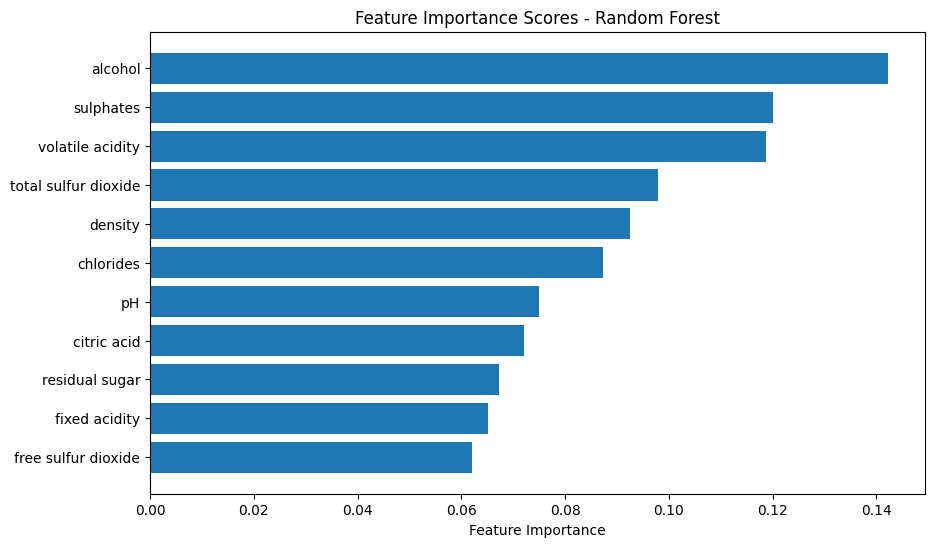

In [ ]:
#Visualize Feature Importances
import matplotlib.pyplot as plt

# Extract sorted feature names and importances
sorted_features = [feature[0] for feature in sorted_importances]
sorted_importance_values = [feature[1] for feature in sorted_importances]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance_values, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores - Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

Feature important chart shows that alcohol is the most important feature that predicts the best quality red wine. Whereas, Free sulfur dioxide has least significant. All other features comes in between has some importance.

### Conclusion

For predicting the best quality red wine, we have tested models like Linear regression, Random Forest regressor and Random forest. And we found that Random Forest is the best predictive model. It provides the most accurate predictions with the least error and the highest explanatory power.

Transformation of data and feature selection are important.The features were selected from the corelation matrix to build the model. Also have done removal of outliers, feature scaling, SMOTE transformation, reduction of skewness, hyperparameter tuning to make the model more accurate.

Alcohol is the most important feature amoung all other features which helps in the prediction of target variable quality.

The limitation here were in the dataset itself. We had to remove 240 duplicates from the dataset and couldn't remove all of the outliners as it will dramatically reduce the number of records. There was less variation in the quality feature itself. As, the quality 5 and 6 were present in large amount compared to 3 and 8 which might lead to the biasness of the model.

In future, by including regularization techniques and focusing on proper data can significantly improve the performance and robustness of models.